<a href="https://colab.research.google.com/github/dsarj/tcc_previsao_pulsares/blob/main/pulse_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from google.colab import files

In [2]:
# Caminho do arquivo a ser lido
data = files.upload()

# Armazenando o conteudo do arquivo lido na variável data
# train_data = pd.read_csv(file_path)

Saving pulsar_data_test.csv to pulsar_data_test.csv


In [3]:
#Exibindo dimensões campos e tipos de dados
pulse_star_train = pd.read_csv(next(iter(data.keys())))

print("\nDimensões de Pulse Star:\n{0}\n".format(pulse_star_train.shape))
print("\nCampos de Pulse Star:\n{0}\n".format(list(pulse_star_train .keys())))
print("\nTipos dos dados:\n{0}\n".format(pulse_star_train .dtypes))

# Printando estatísticas iniciais em tabela bruta
pulse_star_train.describe()


Dimensões de Pulse Star:
(5370, 9)


Campos de Pulse Star:
[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class']


Tipos dos dados:
 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object



,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,5370.000000,5370.000000,4603.000000,5370.000000,5370.000000,4846.000000,5370.000000,5126.000000,0.0
mean,111.168917,46.615074,0.483676,1.751260,12.473587,26.425371,8.233724,102.869088,NaN
std,25.608635,6.940638,1.076893,6.072820,29.145134,19.384489,4.435683,104.748418,NaN
min,6.179688,24.791612,-1.876011,-1.764717,0.213211,7.370432,-2.721857,-1.964998,NaN
25%,101.041016,42.408020,0.030643,-0.189557,1.956522,14.555826,5.700461,33.817330,NaN
50%,114.757812,47.031304,0.227314,0.186468,2.830686,18.549670,8.383695,81.392046,NaN
75%,127.023438,51.133444,0.475056,0.918807,5.590301,28.681787,10.632265,136.893502,NaN
max,192.617188,98.778911,7.608370,65.385974,223.392141,109.712649,34.539844,1191.000837,NaN


In [4]:
# Obtendo primeiros dados da tabela
pulse_star_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [ ]:
''' Explicando as colunas
Mean of the Integrated profile:
Standard deviation: 
'''

In [5]:
pulse_star_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [6]:
# Somando todos os valores NULL
pulse_star_train.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

In [7]:
# Printando o nome das colunas do dataset atual
print('Nomes das colunas atualmente no dataset: ', pulse_star_train.columns)

Nomes das colunas atualmente no dataset:  Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


In [8]:
# Renomeando colunas para uso posterior; Vou atribuir o dataframe com as colunas renomeadas a uma nova variável;
ps_train = pulse_star_train.rename(columns={' Mean of the integrated profile': 'mean_integrated_profile', 
                                            ' Standard deviation of the integrated profile': 'std_deviation_integrated_profile', 
                                            ' Excess kurtosis of the integrated profile':'excess_kurtosis_integrated_profile',
                                            ' Skewness of the integrated profile':'skewness_integrated_profile', 
                                            ' Mean of the DM-SNR curve':'mean_dmsnr_curve', 
                                            ' Standard deviation of the DM-SNR curve':'std_deviation_dmsnr_curve',
                                            ' Excess kurtosis of the DM-SNR curve':'excess_kurtosis_dmsnr_curve', 
                                            ' Skewness of the DM-SNR curve':'skewness_dmsnr_curve', 
                                            ' target_class':'is_pulse_star'})


In [9]:
# Colunas com novos nomes
ps_train.columns

Index(['mean_integrated_profile', 'std_deviation_integrated_profile',
       'excess_kurtosis_integrated_profile', 'skewness_integrated_profile',
       'mean_dmsnr_curve', 'std_deviation_dmsnr_curve',
       'excess_kurtosis_dmsnr_curve', 'skewness_dmsnr_curve', 'target_class'],
      dtype='object')

In [10]:
# Verificando valores faltantes nas colunas
ps_train.isna().sum()

mean_integrated_profile                  0
std_deviation_integrated_profile         0
excess_kurtosis_integrated_profile     767
skewness_integrated_profile              0
mean_dmsnr_curve                         0
std_deviation_dmsnr_curve              524
excess_kurtosis_dmsnr_curve              0
skewness_dmsnr_curve                   244
target_class                          5370
dtype: int64


Analisando o atributo excess_kurtosis_integrated_profile:
count    4603.000000
mean        0.483676
std         1.076893
min        -1.876011
25%         0.030643
50%         0.227314
75%         0.475056
max         7.608370
Name: excess_kurtosis_integrated_profile, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f53437550>]],
      dtype=object)

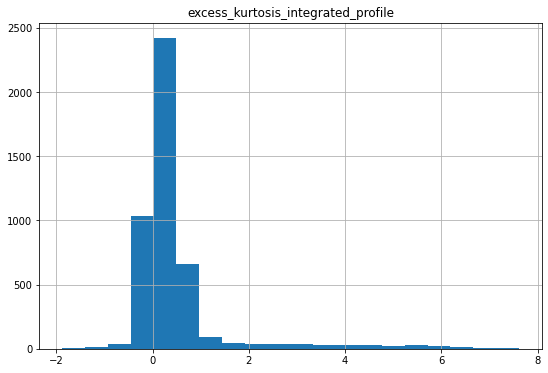

In [11]:
# Três colunas possuem valores faltantes:
# excess_kurtosis_integrated_profile
# std_deviation_dmsnr_curve 
# skewness_dmsnr_curve

# Analisando a coluna excess_kurtosis_integrated_profile
print("\nAnalisando o atributo excess_kurtosis_integrated_profile:")
print(ps_train["excess_kurtosis_integrated_profile"].describe())
ps_train.hist(column='excess_kurtosis_integrated_profile',
                   figsize=(9,6),
                   bins=20)


count    5370.000000
mean        0.447060
std         1.001037
min        -1.876011
25%         0.062973
50%         0.227314
75%         0.420555
max         7.608370
Name: excess_kurtosis_integrated_profile, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f53334910>]],
      dtype=object)

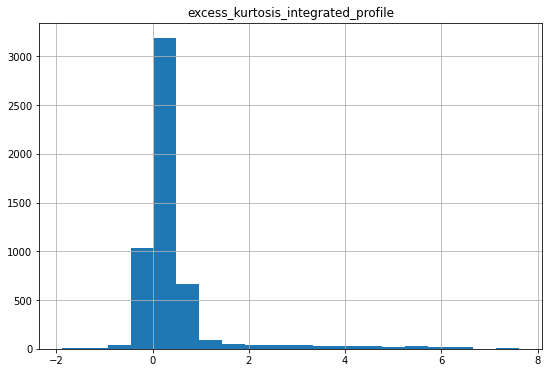

In [12]:
# Preenchendo os valores faltantes da coluna com a mediana
mediana = np.median([el for el in ps_train["excess_kurtosis_integrated_profile"] if (np.isnan(el) == False)])

novo_valor = np.where(ps_train["excess_kurtosis_integrated_profile"].isnull(),
                   mediana,                      
                   ps_train["excess_kurtosis_integrated_profile"])
ps_train["excess_kurtosis_integrated_profile"] = novo_valor

print(ps_train["excess_kurtosis_integrated_profile"].describe())
ps_train.hist(column='excess_kurtosis_integrated_profile',
                   figsize=(9,6),
                   bins=20)



Analisando o atributo std_deviation_dmsnr_curve:
count    4846.000000
mean       26.425371
std        19.384489
min         7.370432
25%        14.555826
50%        18.549670
75%        28.681787
max       109.712649
Name: std_deviation_dmsnr_curve, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f53473810>]],
      dtype=object)

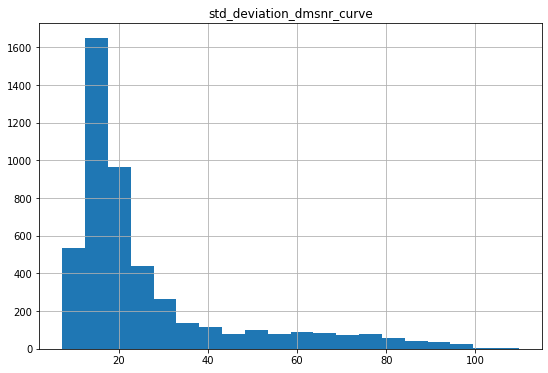

In [13]:
# Analisando a coluna std_deviation_dmsnr_curve
print("\nAnalisando o atributo std_deviation_dmsnr_curve:")
print(ps_train["std_deviation_dmsnr_curve"].describe())
ps_train.hist(column='std_deviation_dmsnr_curve',
                   figsize=(9,6),
                   bins=20)

count    5370.000000
mean       25.656867
std        18.562013
min         7.370432
25%        14.945645
50%        18.549670
75%        26.735818
max       109.712649
Name: std_deviation_dmsnr_curve, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f52d54e50>]],
      dtype=object)

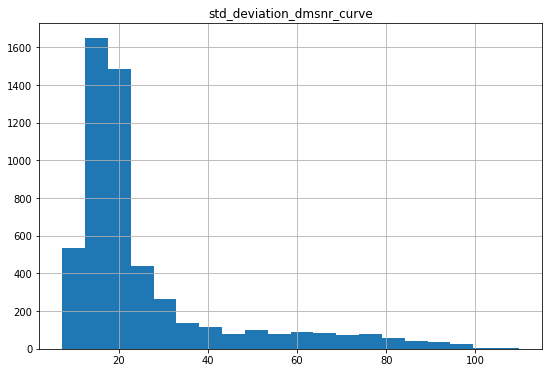

In [14]:
# Preenchendo os valores faltantes da coluna com a mediana
mediana = np.median([el for el in ps_train["std_deviation_dmsnr_curve"] if (np.isnan(el) == False)])

novo_valor = np.where(ps_train["std_deviation_dmsnr_curve"].isnull(),
                   mediana,                      
                   ps_train["std_deviation_dmsnr_curve"])
ps_train["std_deviation_dmsnr_curve"] = novo_valor

print(ps_train["std_deviation_dmsnr_curve"].describe())
ps_train.hist(column='std_deviation_dmsnr_curve',
                   figsize=(9,6),
                   bins=20)


Analisando o atributo skewness_dmsnr_curve:
count    5126.000000
mean      102.869088
std       104.748418
min        -1.964998
25%        33.817330
50%        81.392046
75%       136.893502
max      1191.000837
Name: skewness_dmsnr_curve, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f52e66c50>]],
      dtype=object)

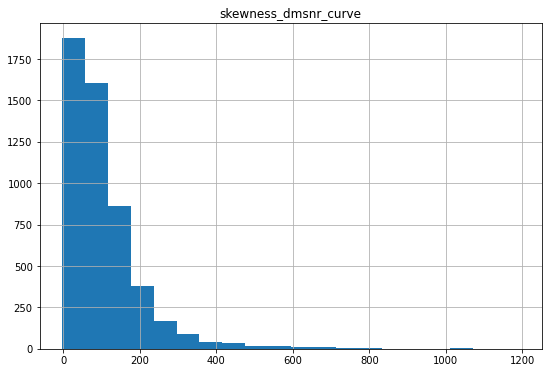

In [15]:
# Analisando a coluna skewness_dmsnr_curve
print("\nAnalisando o atributo skewness_dmsnr_curve:")
print(ps_train["skewness_dmsnr_curve"].describe())
ps_train.hist(column='skewness_dmsnr_curve',
                   figsize=(9,6),
                   bins=20)

count    5370.000000
mean      101.893222
std       102.438256
min        -1.964998
25%        36.169523
50%        81.392046
75%       133.345697
max      1191.000837
Name: skewness_dmsnr_curve, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f52bbd150>]],
      dtype=object)

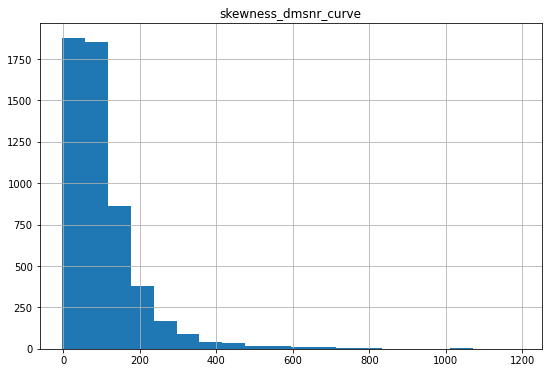

In [16]:
# Preenchendo os valores faltantes da coluna com a mediana
mediana = np.median([el for el in ps_train["skewness_dmsnr_curve"] if (np.isnan(el) == False)])

novo_valor = np.where(ps_train["skewness_dmsnr_curve"].isnull(),
                   mediana,                      
                   ps_train["skewness_dmsnr_curve"])
ps_train["skewness_dmsnr_curve"] = novo_valor

print(ps_train["skewness_dmsnr_curve"].describe())
ps_train.hist(column='skewness_dmsnr_curve',
                   figsize=(9,6),
                   bins=20)

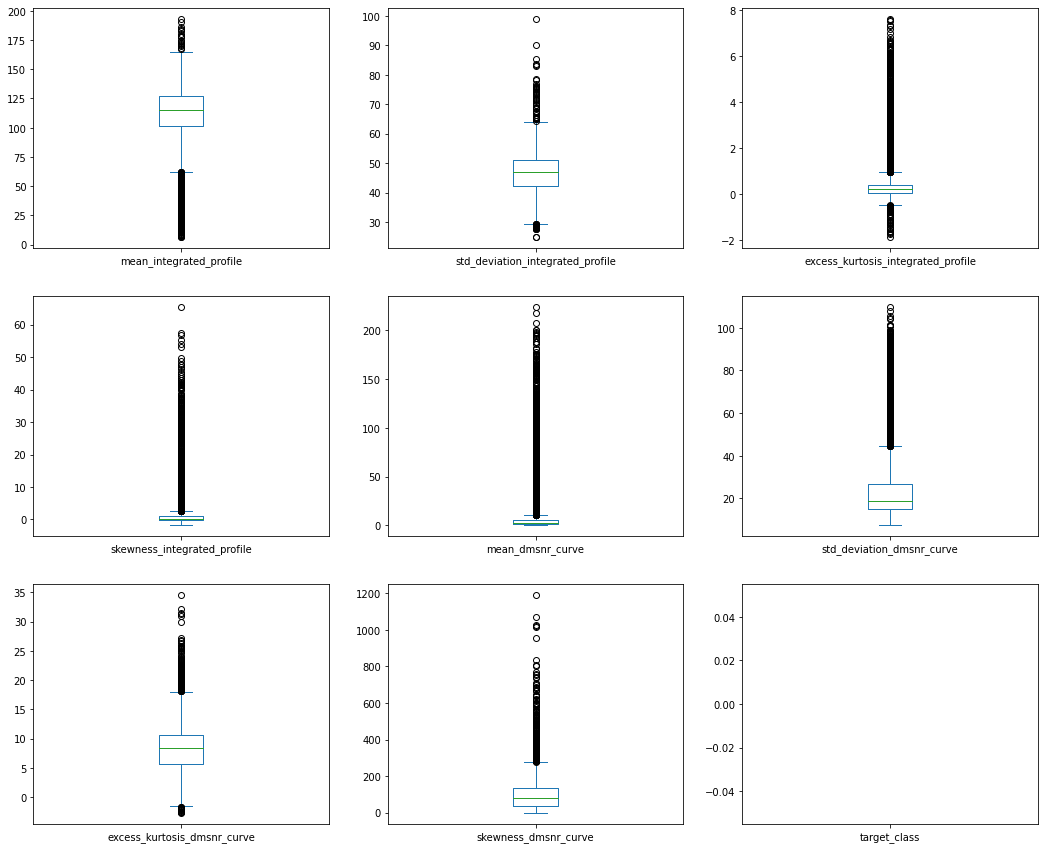

In [17]:
# Exbindo boxplt para lidar com outliers
import matplotlib.pyplot as plt
ps_train.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,3))
plt.show()

In [18]:
# Tratando outliers a partir do metodo de Tukey
def tukey_outliers(x):
    
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    
    interquartil = q3-q1 
    
    teto = q3 + 1.5*interquartil
    piso = q1 - 1.5*interquartil
    

    return teto,piso

In [19]:
# Iterando nas colunas para tratar os outliers
for coluna in ps_train.columns[:-1]:
    teto,piso=tukey_outliers(ps_train[coluna])
    ps_train[coluna]=np.where(ps_train[coluna]>teto,teto,ps_train[coluna])
    ps_train[coluna]=np.where(ps_train[coluna]<piso,piso,ps_train[coluna])

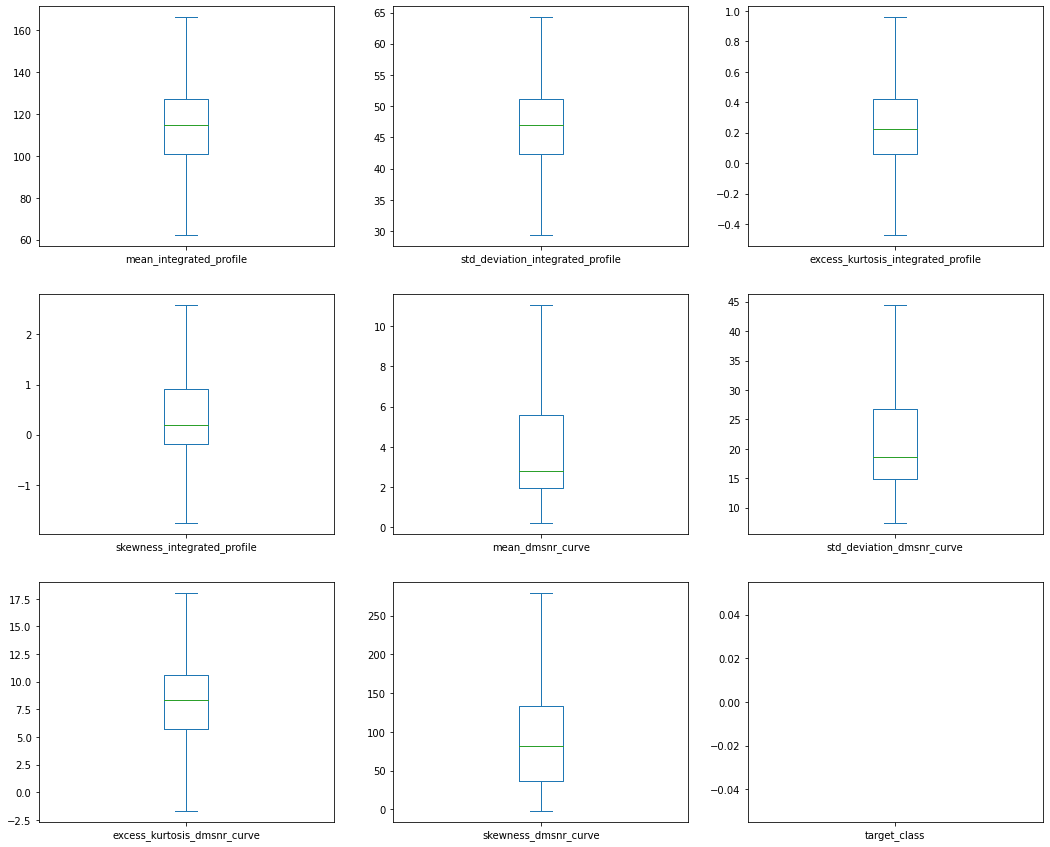

In [20]:
# Plotando resultado do tratamento
ps_train.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,3))
plt.show()

In [21]:
# Salvar arquivo tratado para uso nos modelos
type(ps_train)
ps_train.to_csv(r'pulsar_data_test_clean.csv', index = False)

